# Wine Recommendation System

## Load Datasets

First, load datasets for red and white wine and then concatenate, the system will work with both types. Then visualize first 10 elements

In [146]:
# Reproducibility

import random, numpy as np

SEED = 42
random.seed(SEED); np.random.seed(SEED)

In [147]:
import pandas as pd

red_wine = pd.read_csv("winequality-red.csv", sep=",")
white_wine = pd.read_csv("winequality-white.csv", sep=";")

red_wine["wine_type"] = "red"
white_wine["wine_type"] = "white"

wine_df = pd.concat([red_wine, white_wine], ignore_index=True)

print(wine_df.head(10))
display(wine_df.head(10))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,red
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,red
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,red
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,red
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5,red


## Step 1 - Data Sanity Check and Contract

The purpose of this step is to define solid foundations to start working with the dataset, doing sanity checks to avoid bugs later on or fixes that could result in messy code. 
What I implement here:
- unique `wine_id`, check columns and dtype coherence
- NAN/duplicates, min/max range for features, `wine_type` and `quality` distriution
- Assert and INFO prints, to handle errors or bugs  

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1 - Add ID
if "wine_id" not in wine_df.columns:
    wine_df = wine_df.copy()
    wine_df.insert(0, "wine_id", np.arange(1, len(wine_df) + 1))
print(f"[INFO] wine_id created, total rows = {len(wine_df)}")


[INFO] wine_id created, total rows = 6497


In [149]:
# 2 - Define contract
expected_columns = [
    "wine_id", "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH",
    "sulphates", "alcohol", "quality", "wine_type"
]

required_numeric = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol", "quality"
]
required_categorical = ["wine_type"]

# Soft and hard ranges
soft_ranges = {
    "pH": (0, 14),
    "density": (0.985, 1.08),             
    "alcohol": (0, 20),                   
    "quality": (0, 10)                    
}
non_negative = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide",
    "sulphates", "alcohol"
]
print("[INFO] Defined dataset contract with expected columns, ranges and non negatives")

[INFO] Defined dataset contract with expected columns, ranges and non negatives


In [150]:
# 3 - Check columns
cols = list(wine_df.columns)
missing = [c for c in expected_columns if c not in cols]
extra = [c for c in cols if c not in expected_columns]

if missing:
    print(f"[WARNING] Missing columns: {missing}")
if extra:
    print(f"[WARNING] Extra columns: {extra}")

# Order columns according to contract - in case of extra
wine_df = wine_df[[c for c in expected_columns if c in wine_df.columns] + extra]

In [151]:
# 4 - Check types
print(f"[INFO] Dtypes current: \n{wine_df.dtypes}")

num_mismatch = [c for c in required_numeric if c in wine_df.columns and not pd.api.types.is_numeric_dtype(wine_df[c])]
cat_mismatch = [c for c in required_categorical if c in wine_df.columns and not pd.api.types.is_object_dtype(wine_df[c])]

if num_mismatch:
    print(f"\n[WARNING] These columns should be numerical: {num_mismatch}")
if cat_mismatch:
    print(f"\n[WARNING] These columns should be categorical: {cat_mismatch}")

[INFO] Dtypes current: 
wine_id                   int64
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_type                object
dtype: object


In [152]:
# 5 - Check NAN and duplicates
nan_counts = wine_df.isna().sum()
total_nans = int(nan_counts.sum())
print(f"[INFO] NAN per column: {nan_counts[nan_counts>0] if total_nans>0 else "No NAN values found"}")
print(f"[INFO] Total NANS: {total_nans}")

dup_full = wine_df.duplicated().sum()

# I look for duplicates in chemical features and type, ignore quality
chem_cols = [c for c in required_numeric if c!="quality"] + ["wine_type"]
dup_chem = wine_df.duplicated(subset=[c for c in chem_cols if c in wine_df.columns]).sum()
print(f"[INFO] Duplicates (identical rows for all columns): {dup_full}")
print(f"[INFO] Duplicates (same chem features and wine_type): {dup_chem}")

[INFO] NAN per column: No NAN values found
[INFO] Total NANS: 0
[INFO] Duplicates (identical rows for all columns): 0
[INFO] Duplicates (same chem features and wine_type): 1177


In [153]:
# 6 - Rapid statistics and shape per type
print("[INFO] Distribution for wine_type:")
if "wine_type" in wine_df.columns:
    print(wine_df["wine_type"].value_counts(dropna=False))

if "quality" in wine_df.columns:
    print("\n[INFO] Global quality statistics:")
    print(wine_df["quality"].describe())

    if "wine_type" in wine_df.columns:
        print("\n[INFO] Quality statistics for wine_type:")
        print(wine_df.groupby("wine_type")["quality"].describe())

[INFO] Distribution for wine_type:
wine_type
white    4898
red      1599
Name: count, dtype: int64

[INFO] Global quality statistics:
count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

[INFO] Quality statistics for wine_type:
            count      mean       std  min  25%  50%  75%  max
wine_type                                                     
red        1599.0  5.636023  0.807569  3.0  5.0  6.0  6.0  8.0
white      4898.0  5.877909  0.885639  3.0  5.0  6.0  6.0  9.0


In [154]:
# 7 - Hard checks - this is important to avoid bugs or having strange data

assert wine_df["wine_id"].is_unique, "[ASSERT FAIL] wine_id not unique."
if "quality" in wine_df.columns:
    assert wine_df["quality"].between(0, 10, inclusive="both").all(), "[ASSERT FAIL] Values 'quality' out of range [0..10]."
if "pH" in wine_df.columns:
    assert (wine_df["pH"] >= 0).all(), "[ASSERT FAIL] found negative pH."
if "alcohol" in wine_df.columns:
    assert (wine_df["alcohol"] >= 0).all(), "[ASSERT FAIL] negative alcohol found."

print("\n[INFO] Hard checks gave no issues.")


[INFO] Hard checks gave no issues.


In [155]:
# 8 - Soft checks, warning if something is a little off, but not too serious to cause problems later on

# out of range
for col, (lo, hi) in soft_ranges.items():
    if col in wine_df.columns:
        out_mask = ~wine_df[col].between(lo, hi, inclusive="both")
        n_out = int(out_mask.sum())
        if n_out>0:
            print(f"[WARNING] {col}: {n_out} values out of range [{lo}..{hi}]:")
            print(wine_df.loc[out_mask, ["wine_id", col]].head(5))

# non-negative
for col in non_negative:
    if col in wine_df.columns:
        neg_n = int((wine_df[col]<0).sum())
        if neg_n>0:
            print(f"[WARNING] {col}: {neg_n} values found negative:")
            print(wine_df.loc[wine_df[col]<0, ["wine_id", col]].head(5))

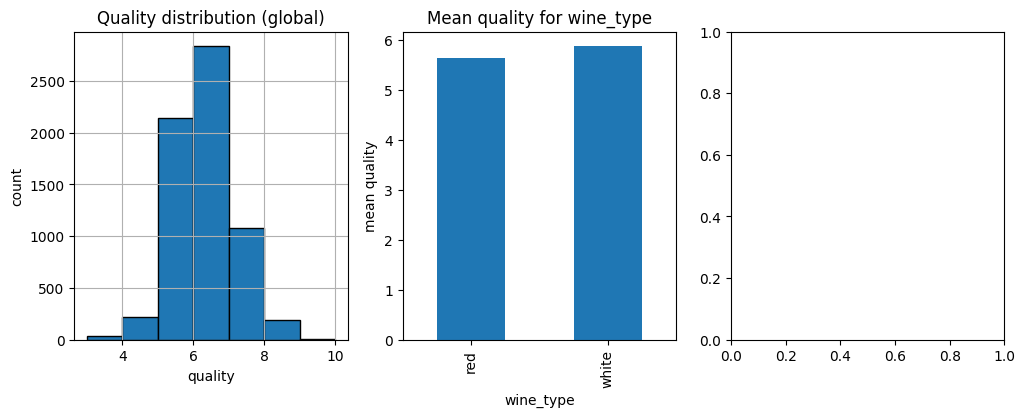

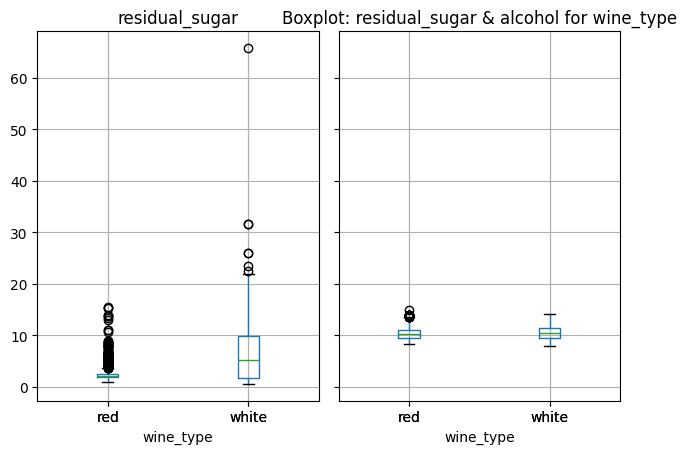

In [156]:
# 9 - Plots

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
if "quality" in wine_df.columns:
    wine_df["quality"].hist(bins=range(int(wine_df["quality"].min()), int(wine_df["quality"].max()) + 2), edgecolor="black")
    plt.title("Quality distribution (global)")
    plt.xlabel("quality")
    plt.ylabel("count")

plt.subplot(1, 3, 2)
if "wine_type" in wine_df.columns and "quality" in wine_df.columns:
    wine_df.groupby("wine_type")["quality"].mean().plot(kind="bar")
    plt.title("Mean quality for wine_type")
    plt.xlabel("wine_type")
    plt.ylabel("mean quality")

plt.subplot(1, 3, 3)
if set(["residual sugar", "alcohol", "wine_type"]).issubset(wine_df.columns):
    tmp = wine_df.rename(columns={"residual sugar": "residual_sugar"})
    tmp.boxplot(column=["residual_sugar", "alcohol"], by="wine_type")
    plt.suptitle("")
    plt.title("Boxplot: residual_sugar & alcohol for wine_type")
    plt.xlabel("wine_type")
    plt.ylabel("value")

plt.tight_layout()
plt.show()

In [157]:
print("[INFO] If no ASSERT FAIL or WARNING were printed in the previous steps, you're good to go!")
print("Otherwise, clean the data according to the contract, to avoid insidious bugs later on! ")


[INFO] If no ASSERT FAIL or WARNING were printed in the previous steps, you're good to go!
Otherwise, clean the data according to the contract, to avoid insidious bugs later on! 


# Step 2 - Preprocessing Pipeline

The purpose of this step is to create a robust Preprocessing Pipeline. For experiment purpose, I try 2 different approaches:
- baseline: StandardScaler for numeric + OneHot for wine_type
- robust: Winsorize for quantile clipping + RobustScaler for numeric + OneHot
- whitened: StandardScaler + PCA(whiten=True) for numeric + OneHot

In [158]:
import os
import numpy as np
import pandas as pd
import joblib
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [159]:
# Ensure wine_df is correctly loaded

assert "wine_id" in wine_df.columns and "wine_type" in wine_df.columns, "[ASSERT FAIL] Needed wine_df with columns wine_id and wine_type."

In [160]:
# 1 - Define the columns

num_cols = [
    "fixed acidity","volatile acidity","citric acid","residual sugar","chlorides",
    "free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"
]
cat_cols = ["wine_type"]

In [161]:
# 2 - Transformer: Winsorizer to handle tails

class Winsorizer(BaseEstimator, TransformerMixin):
    def __init__(self, lower=0.01, upper=0.99):
        self.lower = lower
        self.upper = upper
        self.lo_ = None
        self.hi_ = None
    
    def fit(self, X, y=None):
        X = np.asarray(X, dtype=float)
        self.lo_ = np.nanquantile(X, self.lower, axis=0)
        self.hi_ = np.nanquantile(X, self.upper, axis=0)
        return self
    
    def transform(self, X):
        X = np.asarray(X, dtype=float)
        return np.clip(X, self.lo_, self.hi_)

In [162]:
# 3 - Create pipeline variants

numeric_baseline = Pipeline(steps=[
    ("scaler", StandardScaler())
])
print("[INFO] baseline created")

numeric_robust = Pipeline(steps=[
    ("winsor", Winsorizer(lower=0.01, upper=0.99)),
    ("scaler", RobustScaler(with_centering=True, with_scaling=True))
])
print("[INFO] robust created")

numeric_whitened = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("pca", PCA(n_components=0.95, whiten=True, random_state=SEED))
])
print("[INFO] whitened created")

categorical = Pipeline(steps=[
    ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
])
print("[INFO] one hot created")

[INFO] baseline created
[INFO] robust created
[INFO] whitened created
[INFO] one hot created


In [163]:
# 4 - create ColumnTransformer

def make_preprocessor(version="baseline"):
    if version == "baseline":
        num_pipe = numeric_baseline
    elif version == "robust":
        num_pipe = numeric_robust
    elif version == "whitened":
        num_pipe = numeric_whitened
    else:
        raise ValueError("version must be in {'baseline','robust','whitened'}")
    
    pre = ColumnTransformer(
        transformers=[
            ("num", num_pipe, num_cols),
            ("cat", categorical, cat_cols),
        ],
        remainder="drop",
        verbose_feature_names_out=True
    )

    return pre

In [164]:
# 5 - Chose the variant here

PIPELINE_VERSION = "whitened"
preprocessor = make_preprocessor(PIPELINE_VERSION)

In [165]:
# 6 - Fit + transform, extract artifacts

print(f"[INFO] Fit + transform with pipeline: {PIPELINE_VERSION}")
X = preprocessor.fit_transform(wine_df)
y = wine_df["quality"].to_numpy()
meta = wine_df[["wine_id", "wine_type", "quality"]].copy()

try:
    feature_names = preprocessor.get_feature_names_out()
except Exception:
    feature_names = None
    print(f"Make sure you have sklearn >= 1.0 installed")

print(f"[INFO] X_shape = {X.shape}, y_shape = {y.shape}, meta_shape = {meta.shape}")
if feature_names is not None:
    print(f"[INFO] Number of features out = {len(feature_names)}, like: {list(feature_names[:8])}")

[INFO] Fit + transform with pipeline: whitened
[INFO] X_shape = (6497, 11), y_shape = (6497,), meta_shape = (6497, 3)
[INFO] Number of features out = 11, like: ['num__pca0', 'num__pca1', 'num__pca2', 'num__pca3', 'num__pca4', 'num__pca5', 'num__pca6', 'num__pca7']


In [166]:
# 7 - Check statistics after transformation

def _describe_array(arr, name):
    arr = np.asarray(arr, dtype=float)
    mu = np.nanmean(arr, axis=0).mean()
    sd = np.nanstd(arr, axis=0).mean()
    print(f"[INFO][{name}] Mean mean-columns ≈ {mu:.3f} | STD mean-columns ≈ {sd:.3f}")

num_out = preprocessor.named_transformers_["num"].transform(wine_df[num_cols])
_describe_array(num_out, f"NUMERICS after {PIPELINE_VERSION}")

if PIPELINE_VERSION == "whitened":
    pca = preprocessor.named_transformers_["num"].named_steps["pca"]
    evr = pca.explained_variance_ratio_
    print(f"[INFO][PCA] n_components = {pca.n_components_}, Cumulated variance = {evr.cumsum()[-1]:.3f}")
    print(f"[INFO][PCA] First 5 EVR: {np.round(evr[:5], 3)}")

[INFO][NUMERICS after whitened] Mean mean-columns ≈ 0.000 | STD mean-columns ≈ 1.000
[INFO][PCA] n_components = 9, Cumulated variance = 0.976
[INFO][PCA] First 5 EVR: [0.275 0.227 0.141 0.088 0.065]


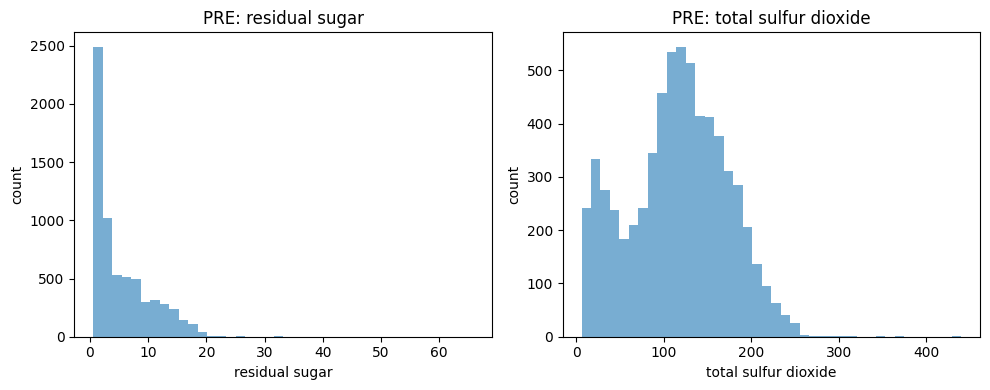

In [167]:
# 8 - Plots for a couple of features before and after

fig, axes = plt.subplots(1, 2, figsize=(10, 4))
for ax, col in zip(axes, ["residual sugar", "total sulfur dioxide"]):
    ax.hist(wine_df[col].values, bins=40, alpha=0.6)
    ax.set_title(f"PRE: {col}")
    ax.set_xlabel(col); ax.set_ylabel("count")
plt.tight_layout(); plt.show()

if PIPELINE_VERSION in ["baseline", "robust"]:
    X_num = num_out  # already transformed
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    idx_rs = num_cols.index("residual sugar")
    idx_ts = num_cols.index("total sulfur dioxide")
    axes[0].hist(X_num[:, idx_rs], bins=40, alpha=0.6)
    axes[0].set_title(f"POST-{PIPELINE_VERSION}: residual sugar (scaled)")
    axes[1].hist(X_num[:, idx_ts], bins=40, alpha=0.6)
    axes[1].set_title(f"POST-{PIPELINE_VERSION}: total sulfur dioxide (scaled)")
    for ax in axes:
        ax.set_xlabel("value"); ax.set_ylabel("count")
    plt.tight_layout(); plt.show()

In [168]:
# 9 - Save artifacts

os.makedirs("artifacts", exist_ok=True)
pp_path = f"artifacts/preprocessor_{PIPELINE_VERSION}.joblib"
joblib.dump(preprocessor, pp_path)
print(f"[INFO] Pipeline saved: {pp_path}")

[INFO] Pipeline saved: artifacts/preprocessor_whitened.joblib


In [169]:
# Return
X_scaled = X
print(f"[INFO] X scaled = {X_scaled}")

[INFO] X scaled = [[-1.84169485  0.26373807 -2.18192206 ... -0.12268524  1.
   0.        ]
 [-1.74579255  0.70123306 -1.64066948 ...  0.73913472  1.
   0.        ]
 [-1.76465912  0.55655079 -1.39670919 ...  0.46682732  1.
   0.        ]
 ...
 [ 0.32808891 -0.45758155  0.07331403 ...  0.23072906  0.
   1.        ]
 [ 0.05173091 -2.24514954  0.11317002 ...  0.44083335  0.
   1.        ]
 [ 0.29445074 -1.83057535  0.59265581 ...  0.31298308  0.
   1.        ]]
